In [67]:
# Libraries
import pandas as pd
import numpy as np

In [6]:
# reading file and assigning it 
iris = pd.read_csv('iris-data.csv')

In [10]:
# show info. There is a column with 5 NaN
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# show head
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# show describe
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
# checking values of non float column
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [29]:
# I assume that are just 3 different classes, but some of them are wrongly written.
# Updating values

iris['class'] = iris['class'].apply(lambda x: x.replace('Iris-setossa','Iris-setosa'))
iris['class'] = iris['class'].apply(lambda x: x.replace('versicolor','Iris-versicolor'))

In [30]:
# checking values of non float column
iris['class'].unique()

array(['Iris-setosa', 'Iris-Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [31]:
# Due to an error before, the changes are not as desired. New update:
iris['class'] = iris['class'].apply(lambda x: x.replace('Iris-Iris-versicolor','Iris-versicolor'))

In [32]:
# checking values of non float column
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
# checking NaNs:
iris.loc[iris['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [42]:
# all 5 NaNs are in the same class. I will check the percentage of that class affected
len(iris.loc[iris['petal_width_cm'].isnull()]) / len(iris.loc[iris['class'] == "Iris-setosa"])

0.1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e7bdb50>,
      dtype=object)

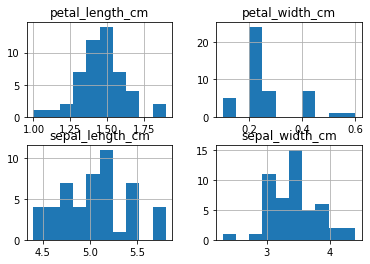

In [46]:
# 10% is quite important percentatge. I'll check the other values for these values.
iris.loc[iris['class'] == "Iris-setosa"].hist()

In [53]:
# petal_length is almost normal distributed, but petal_with is not, 
# so I can't assign a mean or interpolate the values for the 5 NaNs. I will drop them.
iris.dropna(inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ea102d0>,
      dtype=object)

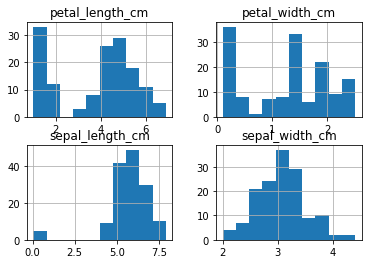

In [54]:
# according to describe and histograms below, there is are some weird results in 
# sepal_length, with a very small value.
iris.hist()

In [55]:
# checking sepal_length column small values
iris.loc[iris['sepal_length_cm'] < 2.5 ]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ea00d10>,
      dtype=object)

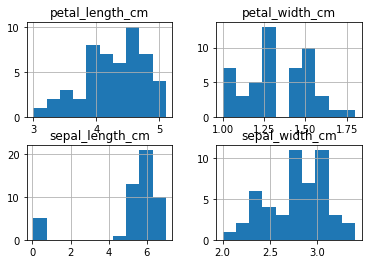

In [56]:
# all these 5 values in the same class. I'll check these class values.
iris.loc[iris['class'] == "Iris-versicolor"].hist()

In [60]:
# most values in sepal_length for class 'Iris-versicolor' are around 6 cm, 
# and these 5 values seem to be in the same shape, but other scale. I will put all on
# the same scale:

iris['sepal_length_cm'] = iris['sepal_length_cm'].apply(lambda x: x*100 if x < 2.5 else x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bcb2690>,
      dtype=object)

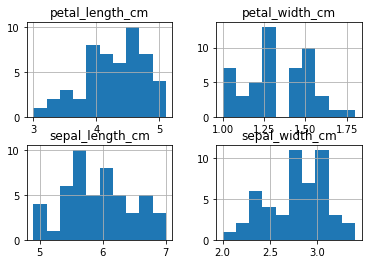

In [61]:
# checking again
iris.loc[iris['class'] == "Iris-versicolor"].hist()

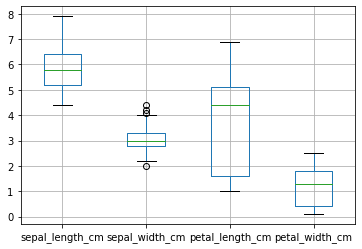

In [65]:
# looking for outliers 
iris.boxplot()

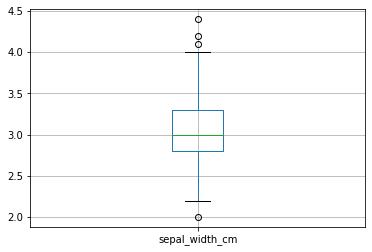

In [66]:
# looking for outliers in detail in sepal_width_cm
iris.boxplot('sepal_width_cm')

In [71]:
# check if there are out of 3xIQR

q1 = np.percentile(iris['sepal_width_cm'], 25)
q3 = np.percentile(iris['sepal_width_cm'], 75)
iqr = q3 - q1
upper_fence = q3 + 3 * iqr
lower_fence = q1 - 3 * iqr

iris.loc[iris['sepal_width_cm']>upper_fence]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [72]:
iris.loc[iris['sepal_width_cm']<lower_fence]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [73]:
# as there are no values out of 3xIQR, I will keep all values

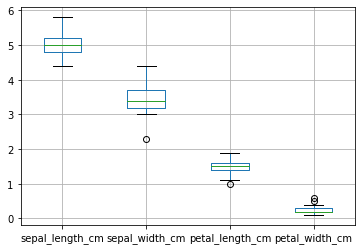

In [76]:
# let's check plots for classes 'setosa' and 'virginica'
iris.loc[iris['class'] == "Iris-setosa"].boxplot()

In [80]:
# checking the 3*IQR Rule in 'sepal-width' for 'Iris-setosa' class
q1 = np.percentile(iris.loc[iris['class'] == "Iris-setosa"]['sepal_width_cm'], 25)
q3 = np.percentile(iris.loc[iris['class'] == "Iris-setosa"]['sepal_width_cm'], 75)
iqr = q3 - q1
upper_fence = q3 + 3 * iqr
lower_fence = q1 - 3 * iqr

iris.loc[iris['class'] == "Iris-setosa"].loc[iris['sepal_width_cm']>upper_fence]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [81]:
iris.loc[iris['class'] == "Iris-setosa"].loc[iris['sepal_width_cm']<lower_fence]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [88]:
# checking the 3*IQR Rule in 'petal-length' for 'Iris-setosa' class
q1 = np.percentile(iris.loc[iris['class'] == "Iris-setosa"]['petal_length_cm'], 25)
q3 = np.percentile(iris.loc[iris['class'] == "Iris-setosa"]['petal_length_cm'], 75)
iqr = q3 - q1
upper_fence = q3 + 3 * iqr
lower_fence = q1 - 3 * iqr

iris.loc[iris['class'] == "Iris-setosa"].loc[iris['petal_length_cm']>upper_fence]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [89]:
iris.loc[iris['class'] == "Iris-setosa"].loc[iris['petal_length_cm']<lower_fence]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [90]:
# checking the 3*IQR Rule in 'petal-width' for 'Iris-setosa' class
q1 = np.percentile(iris.loc[iris['class'] == "Iris-setosa"]['petal_width_cm'], 25)
q3 = np.percentile(iris.loc[iris['class'] == "Iris-setosa"]['petal_width_cm'], 75)
iqr = q3 - q1
upper_fence = q3 + 3 * iqr
lower_fence = q1 - 3 * iqr

iris.loc[iris['class'] == "Iris-setosa"].loc[iris['petal_width_cm']>upper_fence]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
43,5.0,3.5,1.6,0.6,Iris-setosa


In [91]:
iris.loc[iris['class'] == "Iris-setosa"].loc[iris['petal_width_cm']<lower_fence]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [ ]:
# as there are no values out of 3xIQR, I will keep all values


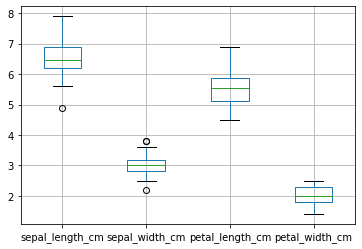

In [77]:
iris.loc[iris['class'] == "Iris-virginica"].boxplot()